In [2]:
#Reference: https://keras.io/examples/vision/captcha_ocr/

In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
import os
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
!wget https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -q captcha_images_v2.zip

--2021-07-12 14:29:43--  https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip [following]
--2021-07-12 14:29:44--  https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9075967 (8.7M) [application/zip]
Saving to: ‘captcha_images_v2.zip’

captcha_images_v2.z 100%[===================>]   8.66M  --.-KB/s    in 0.1s    

2021-07-12 14:29:44 (83.3 MB/s) - ‘captcha_images_v2.zip’

In [6]:
#dataset_preview
img_list = glob('captcha_images_v2/*.png')

len(img_list)

1040

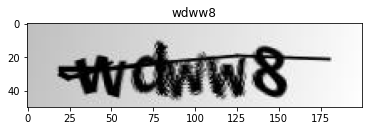

In [7]:
img = cv2.imread(img_list[0])

label = os.path.splitext(os.path.basename(img_list[0]))[0]

plt.title(label)
plt.imshow(img)

In [8]:
#processing
imgs = []
labels = []
max_length = 0

for img_path in img_list:
  imgs.append(img_path)

  label = os.path.splitext(os.path.basename(img_path))[0]
  labels.append(label)

  if len(label) > max_length:
    max_length = len(label)

print(len(imgs), len(labels), max_length)

1040 1040 5


In [9]:
''.join(labels)

'wdww8byfgnnbf8m3p4nnp8c24ybfx625p2m4m2w5pm363f74x37dyww7f8b3b35f6ny3dw8bbw8pf4nbbpwd7gw468f5cm282fx2mxnw4gnbde8fexnxdcn4dnmd86f857x74b2f85y3e25xgpxdwpx37bfnny5e8y63f6e2dg7pcd75mfffe46ywdn2ymn5w5gg7gnfwecfdxdn65c7nn8428b67dwx4y7x8pb4y5xmm3nnc55c6gfbx6bxxfccfp86ng46mf4wfnb6f2pfg38bpwn5ecg5ddeng535n728p24gn75pfwcd6p443mn5p4pdewm746ecd4wn336e677g3fg7mg6mn8n728n8cnex4x4gg5mgw3n24f6w2ycn8fp3wyxemygnc4ygm4fd8n3ffnb2nenmcg438pfxxm5megm8m4x3p67nxf5g7ep85xb5dn4wbncw5bg8f8n5p3mxyxw2gyb6e4gd7yf424bgd4m7e2y7dy3cxy5w28b4d7c4dw3wnbwpn5bb66nfcwy4n2ygexcmn8gmc4xc68nm75bf2nf26pw5ncyx2d463824cx3wgyf28d58pnpw46epef4npxnfx5pdcp48gmnxn5n8b56c34gpnxn7dgc2yd755f2fgeby5y3dnxdpn4wwn6bdn5573d8n4xx5y5g87ppwydnfbg8gng6ee7x456bnnmnnf8be46pd3bd8f4gb3fgnc3nfc6xbd3c8yp5nce5pm6bnnp4e7cdgedpbydx775w5x5nx6825ydw8d3377xx8c23fnbmx776nxnbw5ym3nfdnm67b3gy5bf6ng6nfw3b2b43nw7635362nb3ygfwe445ccy53c2px2xpg25773cpwbmfc35e3ndnmx8bb3ye2ec753eydd3gw2yp7467d5wd2gbde45xgp22x2cgyxmn5c4m3b5penn7ny866y6megee43ym65m857fde737d5228x47pme8

In [10]:
characters = set(''.join(labels))
characters

{'2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y'}

In [11]:
#Encode Labels
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=0, mask_token=None
)

num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), num_oov_indices=0, mask_token=None, invert=True
)

print(labels[0])
encoded = char_to_num(tf.strings.unicode_split(labels[0], input_encoding='UTF-8'))
print(encoded)

wdww8
tf.Tensor([ 5  6  5  5 13], shape=(5,), dtype=int64)


In [12]:
tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')

'wdww8'

In [13]:
#Split Dataset
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.1, random_state=2021)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

936 936
104 104
